# Pulsar detection

# TA COMMENTS (DELETE CELL PRIOR TO SUBMISSION)
- [x] Work is not reproducible. Remember to set seed at the beginning of the report
- [x] Good wrangling of data, each step of the code is clear.


- [x] Need to state the predictors clearly in the introduction, and need to come up with a clear predictive question
- [ ] **No interpretation is given for the summary table or summary plot. Remember, whenever we create a visualization, we always want to explain why we decided to make that graph/table and what information we can pull out of it**
- [x] Need more reasoning for why choosing those four variables as your predictors


- [x] Writing is clear and straightforward, with a concise explanation of each step.
- [ ] Minor grammar mistakes. "activites" instead of "activities". **CHECK GRAMMER AND READ THE WHOLE THING BEFORE CHECKING THIS**

## Introduction
- [x] provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

- [x] clearly state the question you tried to answer with your project

- [x] identify and describe the dataset that was used to answer the question

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**

### Background information

A pulsar is a celestial body which emits precise amounts of electromagnetic radiation. It is highly sought after by astrophysicists as it is an underdeveloped source of possible navigation in space. Knowing this, we obtain a [set of data](https://archive.ics.uci.edu/ml/datasets/HTRU2) describing known pulsar star profiles and their characteristics, clearly labelling them as pulsar and non pulsar respectively. The 8 columns of data are divided to two categories: Integrated profile and DM_SNR curve. Integrated profile is the integration and culmination of individual observations, and DM_SNR  is the signal-to-noise ratio.  

We aim here to train a classifier able to predict with sufficient accuracy whether a suspected observation is a pulsar or not as we aim to answer the question below.

Chosen predictors: Mean, SD, ExcessKurtosis and Skrewness of Integrated profile (Column 1, 2, 3, 4 respectively). This comes from the source [here](https://as595.github.io/classification/), which evaluates similar data and compares the effectiveness of these observed features of pulsars. The chart at the [end of the link to the source](https://as595.github.io/classification/) clearly demonstrates that the integrated profile of the observations are generally more effective than in their categorization comapred to the details of the signal to noise ratios (DM_SNR curve).

### Question?
> Is the celestial body below called `celestial_body` with data about both integrated profile and DM_SNR curve a pulsar or not?

In [56]:
celestial_body = tibble(MeanIntegratedprofile = 100,
                           SdIntegratedProfile = 50,  
                           ExcessKurtosisIntegratedProfile = 0.81,
                           SkewnessIntegratedProfile = 10, 
                           MeanDM_SNRcurve = 77, 
                           SdDM_SNRcurve = 11,  
                           ExcessKurtosisDM_SNRcurve = 6,
                           SkewnessDM_SNRcurve = 10)

## Methods & Results (code should be here)
- [x] describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

> your report should include code which:

- [x] loads data from the original source on the web 
    
- [x] wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    
- [x] performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    
- [x] creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    
- [x] performs the data analysis
    
- [ ] creates a visualization of the analysis (MAKE SURE THAT THE AXIS ARE LABELED RIGHT AND THE INTEG PROFILE IS EXPLAINED THE CHART)
    
- [ ] note: all tables and figure should have a figure/table number and a legend (MAKE SURE THAT THE FIGS HAVE EXPLAINATION BEFORE CROSSING)

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**


First, we load the necessary libraries for R- tidyverse and tidymodels. These are both necessary for loading and cleaning our data, as well as providing the functioning code to train our classifier.

In [27]:
# loading dependencies
library(tidyverse)
library(tidymodels)

#### Showing that the data can be read and tidying the data

Next, we read the data (given as a URL) and tidy it to at least a more presentable format, with human readable column names and the Class column set a factor type for use in our classification model.  We set the seed first to ensure that our results will be reproducible. 

In [28]:
# setting seed
set.seed(8888)

# loading the data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
destFile <- "pulsarData.zip"
download.file(url, destFile)
pulsarData <- read_csv(unzip("pulsarData.zip", "HTRU_2.csv"), col_names = FALSE)


# adding the column names
colnames(pulsarData) <- c("MeanIntegratedprofile", # X1
                           "SdIntegratedProfile",   # X2
                           "ExcessKurtosisIntegratedProfile", # X3
                           "SkewnessIntegratedProfile", #X4
                           "MeanDM_SNRcurve", # X5
                           "SdDM_SNRcurve",  #X6
                           "ExcessKurtosisDM_SNRcurve", #X7
                           "SkewnessDM_SNRcurve", #X8
                           "Class") #X9
# factoring the class 
pulsarData = mutate(pulsarData, Class = as.factor(Class))
head(pulsarData)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


MeanIntegratedprofile,SdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,MeanDM_SNRcurve,SdDM_SNRcurve,ExcessKurtosisDM_SNRcurve,SkewnessDM_SNRcurve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


`FIG. 1` is the above table which shows the initial observations in the original dataset

#### Dividing the data into training data and validating data

Now we split our data into training and testing sets for our model to work on, leaving the testing set alone for now (so that it doesn't influence our data). Allowing it to do so would lead to a falsely high accuracy for the classifier (as we would be testing it on data it has already seen!).

In [29]:
# setting seed
set.seed(8888)

pulsarSplit <- initial_split(pulsarData, prop = 0.75, strata = Class)
pulsarTrain <- training(pulsarSplit)
pulsarTesting <- testing(pulsarSplit)

#### Summarizing the data in at least one table

 As mentioned in the introduction, we chose the following columns: Mean, SD, ExcessKurtosis and Skrewness of Integrated profile. We used the final figure from [this source](https://as595.github.io/classification/) to help us choose, picking the four highest features with relative importance. By refering to the chart at the end of the webpage you can observe that the features associated with integrated profile had a higher relative importance compared to that of the DM SNR curve according to the source.

In [30]:
# Summarize the data in at least one table
pulsarTrain %>% group_by(Class) %>% summarize(Count = n(), 
                                              IQRMeanIntegratedprofile = IQR(MeanIntegratedprofile), 
                                              MedianSdIntegratedprofile = mad(SdIntegratedProfile), 
                                              MeanExcessKurtosisIntegratedProfile = mean(ExcessKurtosisIntegratedProfile),
                                              SkewnessIntegratedProfile = mean(SkewnessIntegratedProfile))

Class,Count,IQRMeanIntegratedprofile,MedianSdIntegratedprofile,MeanExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,12193,23.00781,5.870108,0.2137852,0.3875657
1,1230,47.07617,8.402391,3.1239039,15.4233106


`FIG. 2` is the above table showing data about each of the selected features for prediction

#### Visualizing the data

We visualize the strength of relationship between variables to help us in choosing our four to use. This, alongside the source from earlier, are our guidance for selecting our variables. We judge the graphs by eye to pick out the best relationship seen.

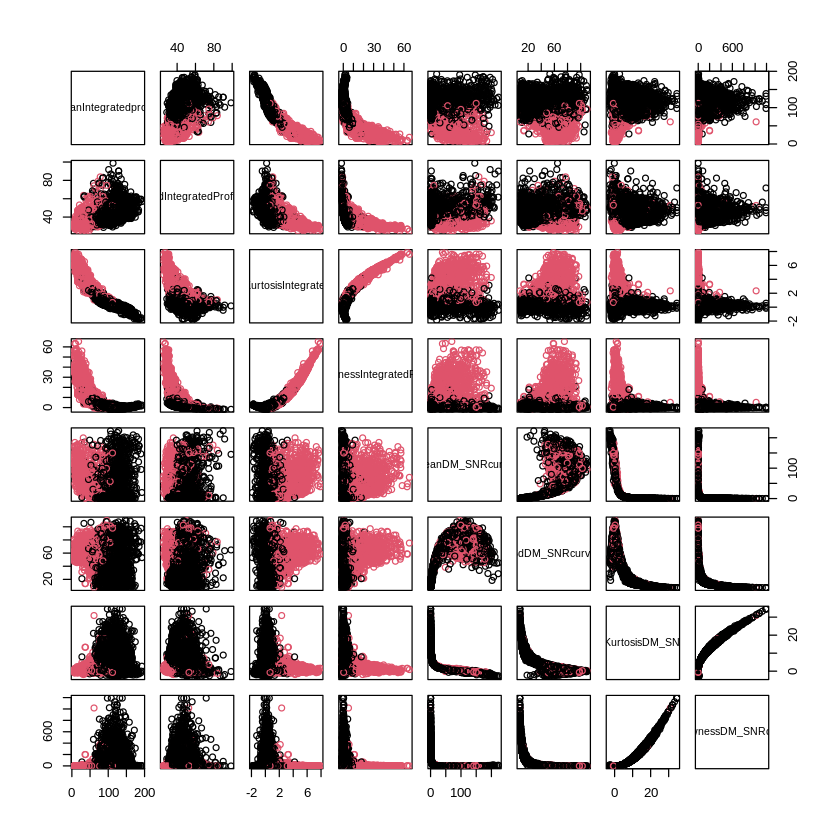

In [31]:
plot(pulsarTrain[1:8], col= pulsarTrain$Class)

`FIG. 3` is the chart above that shows the relationship between each 2 of the features in the original data set 

#### Finding the optimal K

We will be creating our recipe and model and fit them in a workflow using our training data. We then use cross validation and visualize the results to choose the best k-value, thus tuning our classifier.  All the while, we only use the training data which we split from earlier.

In [33]:
# Chosen predictors: Mean, SD, ExcessKurtosis and Skewness of Integrated profile (Column 1, 2, 3, 4 respectively).

# making the recipe
pulsar_recipe <- recipe(Class ~ MeanIntegratedprofile + SdIntegratedProfile + ExcessKurtosisIntegratedProfile + SkewnessIntegratedProfile,
                        data = pulsarTrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# maKing the model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

pulsar_vfold <- vfold_cv(pulsarTrain, v = 10, strata = Class)

In [43]:
# finding the optimal k
knn_results <- workflow() |>
      add_recipe(pulsar_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = pulsar_vfold, grid = 10) |>
      collect_metrics()
head(knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9661018,10,0.001803956,Preprocessor1_Model1
2,roc_auc,binary,0.9254694,10,0.003855925,Preprocessor1_Model1
3,accuracy,binary,0.9763092,10,0.001023063,Preprocessor1_Model2
3,roc_auc,binary,0.9363106,10,0.003108171,Preprocessor1_Model2
5,accuracy,binary,0.9776499,10,0.001054515,Preprocessor1_Model3
5,roc_auc,binary,0.9397821,10,0.003217220,Preprocessor1_Model3


#### Determining the accuracy of each K

`FIG. 4` is the table above that shows the metrics collected after tuning

We using 10-fold to aggregate the mean and standard error. Since we are focusing on estimated accuracy, we filter out other information.

In [53]:
# determining the accuracy associated with each k
accuracies <- knn_results |>
  filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9661018,10,0.0018039560,Preprocessor1_Model1
3,accuracy,binary,0.9763092,10,0.0010230630,Preprocessor1_Model2
5,accuracy,binary,0.9776499,10,0.0010545147,Preprocessor1_Model3
7,accuracy,binary,0.9782459,10,0.0009677869,Preprocessor1_Model4
9,accuracy,binary,0.9783948,10,0.0010003689,Preprocessor1_Model5
10,accuracy,binary,0.9783948,10,0.0010003689,Preprocessor1_Model6


`FIG. 5` is the table above which is the collection of accuracy from the metrics in FIG. 4

The standard error is low which means we could use 10 fold instead of adding up the fold times. 
Next, we want find the best number of neighbors. We plotting the  accuracy of each neighbors and choose the highest one.

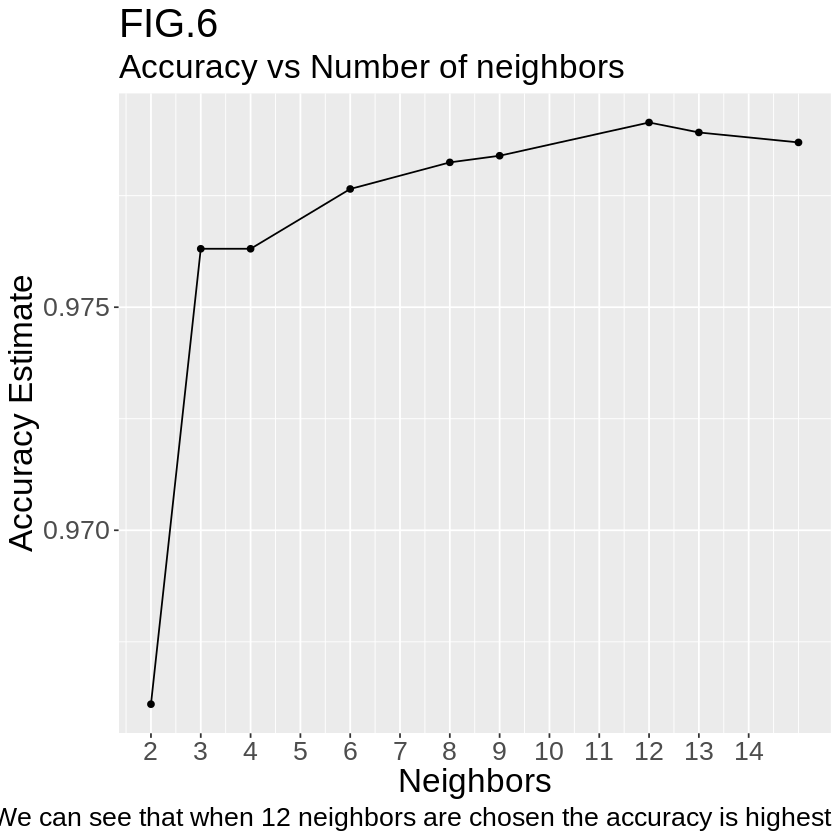

In [36]:
# drawing a plot of the Ks and their accuracy
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() + 
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +
    labs(x = "Neighbors", y = "Accuracy Estimate") + 
    labs(title = "FIG.6",
              subtitle = "Accuracy vs Number of neighbors",
              caption = "We can see that when 12 neighbors are chosen the accuracy is highest") + 
    theme(text = element_text(size = 20))

cross_val_plot

#### Extracting K

According to `FIG.6`, We choose 12 be our K. 

In [37]:
# determining the k that had the highest accuracy 
k <- (accuracies |> arrange(desc(mean)) |> slice(1))$neighbors 
k

[1] 12

#### Building the KNN model with selected K

Using `K = 12` and Test data `pulsarTest` to test our model accuracy

In [41]:
# the knn model using this new k
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
  set_engine("kknn") |>
  set_mode("classification")

# fitting the model 
knn_fit <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(knn_spec) |>
  fit(data = pulsarTrain)

pulsar_test_predictions <- predict(knn_fit, pulsarTesting) |>
                            bind_cols(pulsarTesting)

head(pulsar_test_predictions)

.pred_class,MeanIntegratedprofile,SdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,MeanDM_SNRcurve,SdDM_SNRcurve,ExcessKurtosisDM_SNRcurve,SkewnessDM_SNRcurve,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
0,102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
0,136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
0,88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
0,107.25000,52.62708,0.45268802,0.1703474,2.331940,14.48685,9.001004,107.97251,0
0,107.25781,39.49649,0.46588196,1.1628771,4.079431,24.98042,7.397080,57.78474,0


`FIG. 7` is the table above. It shows the original data (the initial rows) fused with .pred_class column which is the classifcation based on the model we built and true value (class i.e., if it is a pulsar or not) of the observation

#### Finding the accuracy of the model

In [42]:
pulsar_prediction_accuracy <- pulsar_test_predictions |>
                                 metrics(truth = Class, estimate = .pred_class) |> 
                                 filter(.metric == "accuracy")  
pulsar_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9789944


`FIG. 8` is the table above showing the overall accuracy of our model

**Our Accuracy estimate is 0.9789944**

### Visualization of the analysis
Below is `FIG. 9` showing the Mean and ExcessKurtosis of the integrated profile that are colored based on whether or not they are a pulsar

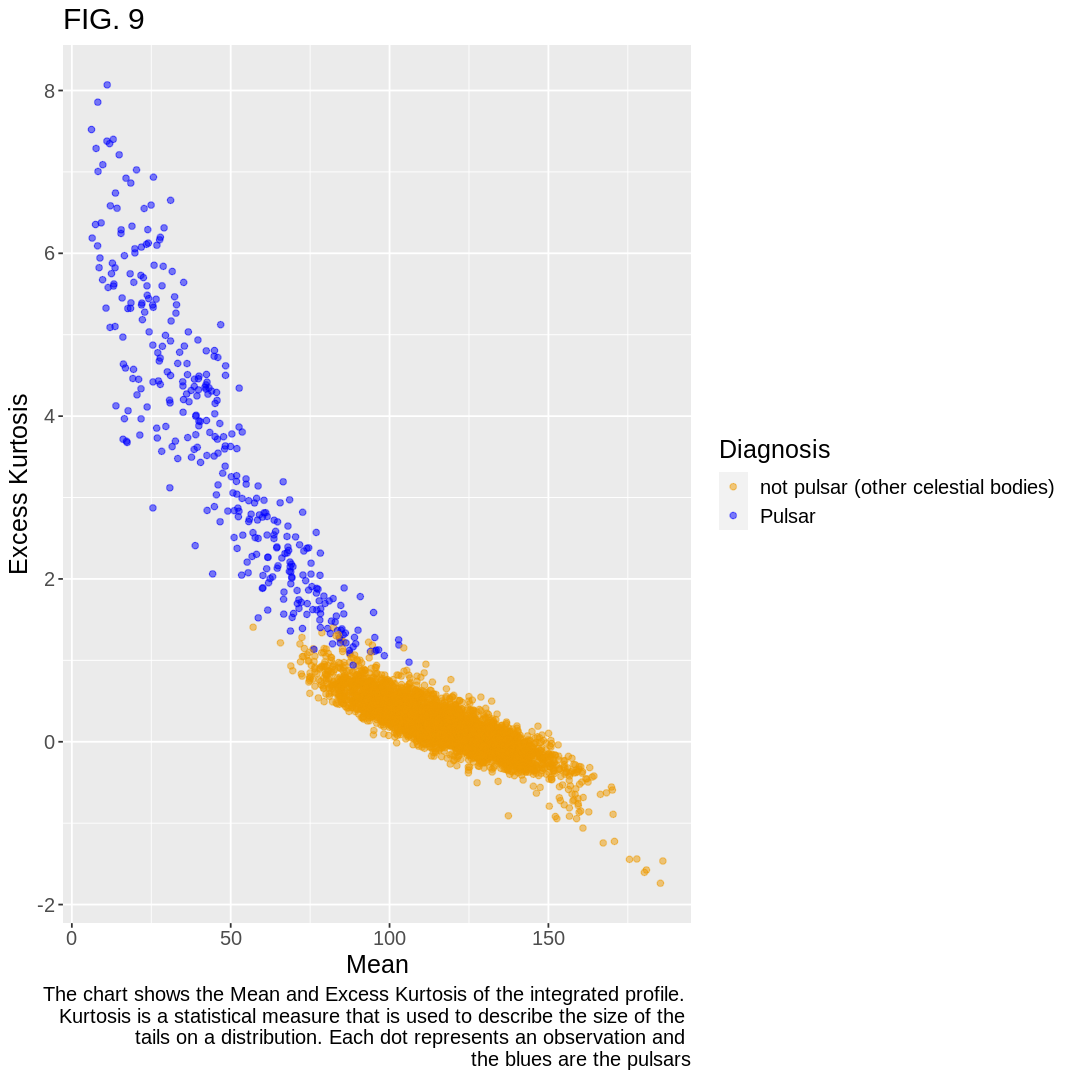

In [91]:
ggplot(pulsar_test_predictions, aes(x = MeanIntegratedprofile, y = ExcessKurtosisIntegratedProfile, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  xlab("Mean of Integrated profile") +
  ylab("Excess Kurtosis of Integrated profile") +
  labs(color = "Diagnosis") +
  scale_color_manual(labels = c("not pulsar (other celestial bodies)", "Pulsar"), 
                     values = c("orange2", "Blue")) + 
  ggtitle("FIG. 9") + labs(caption = "The chart shows the Mean and Excess Kurtosis of the integrated profile. 
Kurtosis is a statistical measure that is used to describe the size of the 
tails on a distribution. Each dot represents an observation and 
the blues are the pulsars") +
  theme(text = element_text(size = 15))

Now we want to answer our research question with the model that we built. Is `celestial_body` a pulsar or not?

In [57]:
predict(knn_fit,celestial_body)

.pred_class
<fct>
1


Our model suggests that based on the 12 closest observations, the `celestial_body` **is a pulsar**

## Discussion
- [x] summarize what you found

- [x] discuss whether this is what you expected to find?

- [x] discuss what impact could such findings have?

- [x] discuss what future questions could this lead to?

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**


Reporting on the model itself, we find that the optimal amount of neighbors to use is 12, where the accuracy estimates levels off (little significant change on either side of the graph) at 0.9789944. We may assume that this is sufficient for solving our predictive question; namely, whether it was possible to train a classifier to pick out pulsars from obtained celestial data. The chances of the model predicting incorrectly are negligible which minimizes the chances of a failed costly setup to survey the body further.

Our expectations for the results were that the percentage of celestial bodies which are pulsars are fairly small; judging from the class division, 16,259 observations are noise while 1639 observations were reported as pulsars. The proportion evens out to 0.10%. This highlights the importance of an accurate model able to pick pulsars out from the general noise of outer space, for being inaccurate is fairly easy. 

We introduced the importance of pulsars in the beginning of the report; pulsar navigation in deep space is an area of space currently little explored. Current methods are suffering from saturation and communication delays as shown by [this article](https://iopscience.iop.org/article/10.3847/1538-4365/ab3718/meta#apjsab3718s6) on pulsar navigation from the Insight-HXMT Satellite. We can extrapolate these issues will worsen in the future as the net of communication around the Earth thickens further. Furthermore, in the Discussions section of our article, the limitations of our current technology require that at least four pulsar stars be known as a reference point near the satellite for navigation. Thus, the more pulsar stars we can pinpoint, the better for deep space mapping! 

 According to [this feasibility study on such](https://www.esa.int/gsp/ACT/doc/ARI/ARI%20Study%20Report/ACT-RPT-MAD-ARI-03-4202-Pulsar%20Navigation-UPC.pdf), deep space exploration is complex and costly, and using pulsars is an untapped source of navigation. A model able to correctly identify one not only is a huge asset for space travel, but also saves funding wasted on finding one by trial and error. In addition, the article highlights the importance of being able to distinguish between background stellar noise and the signatures of a pulsar which both happen to be the classes involved in training our classifier.

Considering the possibilities of pulsar navigation, how far is mankind able to traverse in space, and what will we find there? Perhaps with pulsars further, more esoteric, more effective methods of navigation may be unlocked; celestial bodies hidden away with new potential for astronomy, beyond the corners of our known map of space. With our technology being as limited as is, pulsar stars seem very out of our reach; however with the ability to parse noise from star, we may be able to use classification for even further reaches yet. 



## References
- [x] At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
 
- [x] Make sure to cite the source of your data as well.

- [x] converted the sources to APA citation and added all of the source and the criteria above are satisfied 

**DELETE THE CRIT ABOVE ONLY BEFORE SUBMISSION**


##### source of data

[R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) 

##### additional resources

[S. J. Zheng et al 2019 ApJS 244 1 DOI 10.3847/1538-4365/ab3718](https://iopscience.iop.org/article/10.3847/1538-4365/ab3718/meta#apjsab3718s6)

[Sala Álvarez, J., Urruela Planas, A., Villares Piera, N. J., Estalella, R., & Paredes, J. M. (2004). Feasibility study for a spacecraft navigation system relying on pulsar timing information. Contract Number: 18148/04/NL/MV](https://www.esa.int/gsp/ACT/doc/ARI/ARI%20Study%20Report/ACT-RPT-MAD-ARI-03-4202-Pulsar%20Navigation-UPC.pdf)

[The Pulsar Classification Problem. CSC2019 - Introduction to machine learning. (n.d.). Retrieved December 7, 2022](https://as595.github.io/classification/)
